In [1]:
##Alunos: Guilherme Milani e Ricardo Berndt

In [1]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


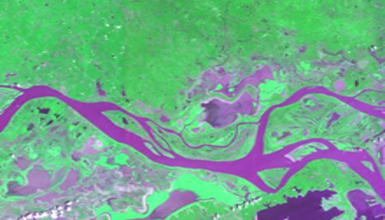

In [4]:
from IPython.display import Image as IPImage, display
from PIL import Image as PILImage , ImageOps as ImageOps
import cv2
import numpy as np

def transformarImagensMesmoTamanho(imagem_entrada, altura, largura):
     new_size = (largura, altura)
     img = PILImage.open(imagem_entrada)
    
     resized_img = img.resize(new_size)
    
    # Save the resized image
     resized_img.save(imagem_entrada)

def converterParaPretoEBranco(imagem_entrada, imagem_saida):
    img = PILImage.open(imagem_entrada)
    img_bw = img.convert('L')
    img_bw.save(imagem_saida)

transformarImagensMesmoTamanho('chuvoso.png',220, 385)
transformarImagensMesmoTamanho('estiagem.png',220, 385)

converterParaPretoEBranco('chuvoso.png','saida_preto_e_branco_chuvoso.png')
converterParaPretoEBranco('estiagem.png', 'saida_preto_e_branco_estiagem.png')

display(IPImage(filename='estiagem.png', width = 300))


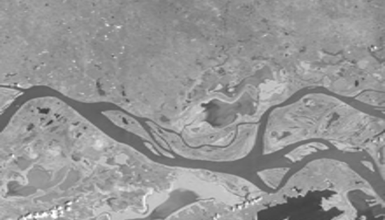

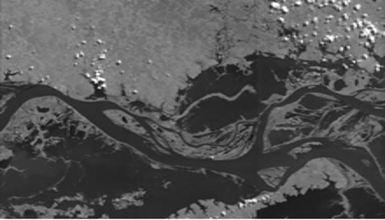

In [5]:
display(IPImage(filename='saida_preto_e_branco_estiagem.png', width = 300))
display(IPImage(filename='saida_preto_e_branco_chuvoso.png', width = 300))

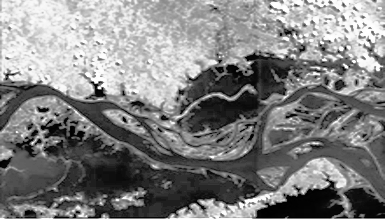

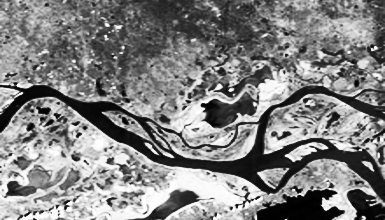

In [6]:

def equalizacao(imagem_entrada,imagem_saida):
    imagem_cinza = cv2.imread(imagem_entrada, cv2.IMREAD_GRAYSCALE)
    imagem_equalizada = cv2.equalizeHist(imagem_cinza)
    converte_img = PILImage.fromarray(imagem_equalizada.astype(np.uint8))
    converte_img.save(imagem_saida)


equalizacao('saida_preto_e_branco_chuvoso.png', 'saida_equalizada_chuvoso.png')
display(IPImage(filename='saida_equalizada_chuvoso.png', width=300))    
equalizacao('saida_preto_e_branco_estiagem.png', 'saida_equalizada_estiagem.png')
display(IPImage(filename='saida_equalizada_estiagem.png', width=300)) 

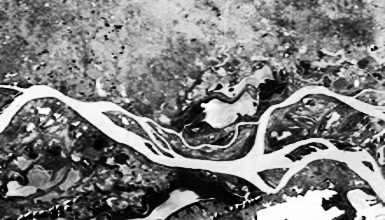

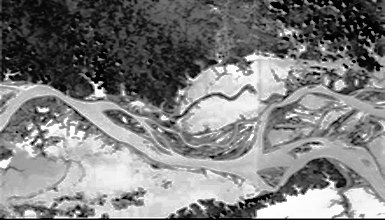

In [7]:
def negativarImagem(imagem_entrada, imagem_saida):
    img = PILImage.open(imagem_entrada)
    
    inverted_img = ImageOps.invert(img)

    # Salvar a imagem negativa
    inverted_img.save(imagem_saida)

negativarImagem('saida_equalizada_estiagem.png', 'negativada_estiagem.png')
negativarImagem('saida_equalizada_chuvoso.png', 'negativada_chuvoso.png')

display(IPImage(filename='negativada_estiagem.png', width = 300))
display(IPImage(filename='negativada_chuvoso.png', width = 300))

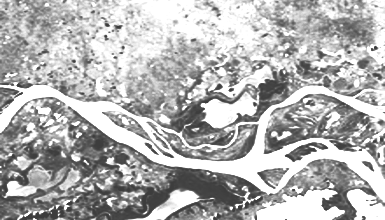

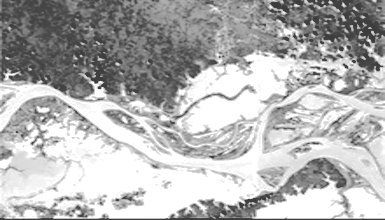

In [8]:
def realce(imagem_entrada, imagem_saida):
    imagem = cv2.imread(imagem_entrada)
    imagem_realcada = cv2.add(imagem, 60)
    cv2.imwrite(imagem_saida, imagem_realcada)

realce('negativada_estiagem.png', 'estiagem_realcada.png')
display(IPImage(filename='estiagem_realcada.png', width=300))
realce('negativada_chuvoso.png', 'chuvoso_realcada.png')
display(IPImage(filename='chuvoso_realcada.png', width=300))

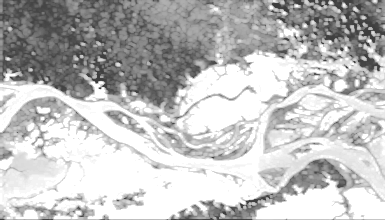

In [9]:
def dilatacao(imagem_entrada, imagem_saida, kernel_size=2):
    imagem_binaria = cv2.imread(imagem_entrada)
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    imagem_dilatada = cv2.dilate(imagem_binaria, kernel, iterations=1)
    converte_img = PILImage.fromarray(imagem_dilatada.astype(np.uint8))
    converte_img.save(imagem_saida)


dilatacao('chuvoso_realcada.png', 'chuvoso_dilatada.png')
display(IPImage(filename='chuvoso_dilatada.png', width=300))

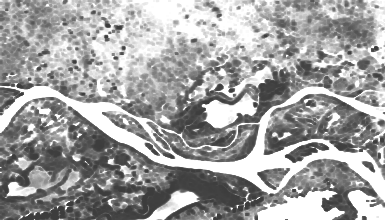

In [10]:
def erosao(imagem_entrada, imagem_saida, kernel_tamanho=2):
    imagem_binaria = cv2.imread(imagem_entrada)
    kernel = np.ones((kernel_tamanho, kernel_tamanho), np.uint8)
    imagem_erodida = cv2.erode(imagem_binaria, kernel, iterations=1)
    converte_img = PILImage.fromarray(imagem_erodida.astype(np.uint8))
    converte_img.save(imagem_saida)

erosao('estiagem_realcada.png', 'estiagem_erodida.png')
display(IPImage(filename='estiagem_erodida.png', width=300))

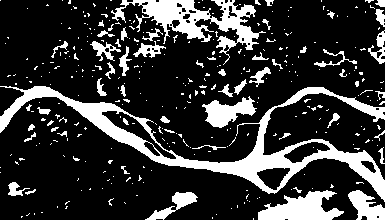

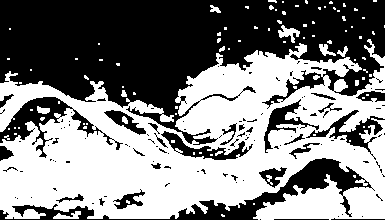

In [11]:
def binarizacao(imagem_entrada, imagem_saida, threshold_value):
    img = PILImage.open(imagem_entrada)
    img_array = np.array(img)
    binary_array = np.where(img_array <= threshold_value, 0, 255)
    
    binary_img = PILImage.fromarray(binary_array.astype(np.uint8))
    binary_img.save(imagem_saida)

binarizacao('estiagem_erodida.png', 'saida_binarizada_estiagem.png',240)
binarizacao('chuvoso_dilatada.png', 'saida_binarizada_chuvoso.png',200)
display(IPImage(filename='saida_binarizada_estiagem.png', width=300))
display(IPImage(filename='saida_binarizada_chuvoso.png', width=300))

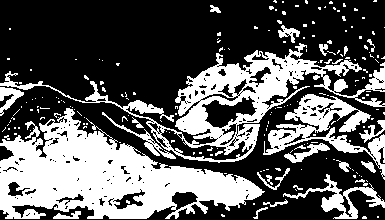

In [12]:
def subtrairImagens(imagemSubtraida,imagemSubtrai, saida):
    
    img1 = cv2.imread(imagemSubtraida)
    img2 = cv2.imread(imagemSubtrai)
    
    subtract =cv2.subtract(img1, img2)
    converte_img = PILImage.fromarray(subtract.astype(np.uint8))
    converte_img.save(saida)


subtrairImagens('saida_binarizada_chuvoso.png','saida_binarizada_estiagem.png',"saida_subtraida.png")
display(IPImage(filename='saida_subtraida.png', width=300))

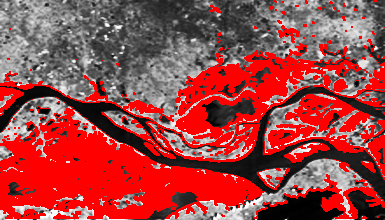

In [13]:
def sobrepor_areas_inundadas(caminho_imagem_seca, caminho_areas_inundadas, caminho_imagem_saida):
    imagem_seca = PILImage.open(caminho_imagem_seca).convert('L')
    areas_inundadas = PILImage.open(caminho_areas_inundadas).convert('L') 
    
    imagem_seca_array = np.array(imagem_seca)
    areas_inundadas_array = np.array(areas_inundadas)
    
    imagem_seca_colorida = PILImage.fromarray(np.stack([imagem_seca_array]*3, axis=-1), 'RGB')
    vermelho = PILImage.new('RGB', imagem_seca_colorida.size, color=(255, 0, 0))
    mascara_inundada = areas_inundadas_array == 255
    
    imagem_saida_array = np.where(mascara_inundada[:, :, None], np.array(vermelho), np.array(imagem_seca_colorida))
    imagem_saida = PILImage.fromarray(imagem_saida_array, 'RGB')
    imagem_saida.save(caminho_imagem_saida)

sobrepor_areas_inundadas('saida_equalizada_estiagem.png','saida_subtraida.png', 'imagem_colorida.png')
display(IPImage(filename='imagem_colorida.png', width=300))

In [14]:
def calcular_area_em_vermelho(imagem_colorida):
    img1 = PILImage.open(imagem_colorida)
    areas_inundadas_array = np.array(img1)
    area_em_vermelho = np.sum(areas_inundadas_array == 255)
    print(f'Valor da área inudada:{area_em_vermelho}')

calcular_area_em_vermelho('saida_subtraida.png')

Valor da área inudada:91656
